In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from calculate import *
import pandas as pd
way_keys = ["A", "B", "C", "D", "E", "F"]
price_keys = ["lj1","j_lj1","lj2","j_lj2","cp","j_cp","sale","diaohuan","chaijie"]

In [3]:
condition_prob=[
    [0.1,0.1,0.1],
    [0.2,0.2,0.2],
    [0.1,0.1,0.1],
    [0.2,0.2,0.2],
    [0.1,0.2,0.1],
    [0.05,0.05,0.05]
]
condition_p=[
    [4,2,18,3,6,3,56,6,5],
    [4,2,18,3,6,3,56,6,5],
    [4,2,18,3,6,3,56,30,5],
    [4,1,18,1,6,2,56,30,5],
    [4,8,18,1,6,2,56,10,5],
    [4,2,18,3,6,3,56,10,40]
]

In [4]:
way_st=set()
st=[0,1]
for a in st:
    for b in st:
        for c in st:
            for d in st:
                for e in st:
                    for f in st:
                        if e or f:
                            d=1
                        if a:
                            e=0
                        if b:
                            f=0
                        way_st.add((a,b,c,d,e,f))
way_st=list(way_st)                        
print(way_st)

[(1, 1, 1, 0, 0, 0), (1, 0, 1, 1, 0, 0), (1, 0, 0, 0, 0, 0), (0, 1, 0, 1, 0, 0), (0, 0, 0, 1, 1, 0), (0, 0, 1, 1, 0, 0), (0, 0, 0, 0, 0, 0), (1, 1, 1, 1, 0, 0), (0, 1, 1, 0, 0, 0), (1, 0, 0, 1, 0, 1), (0, 0, 1, 1, 1, 1), (0, 0, 1, 0, 0, 0), (0, 1, 1, 1, 1, 0), (0, 1, 0, 0, 0, 0), (0, 0, 0, 1, 0, 1), (1, 1, 0, 1, 0, 0), (1, 0, 1, 1, 0, 1), (1, 1, 0, 0, 0, 0), (0, 1, 0, 1, 1, 0), (1, 0, 0, 1, 0, 0), (0, 0, 1, 1, 1, 0), (0, 0, 0, 1, 0, 0), (0, 0, 0, 1, 1, 1), (1, 0, 1, 0, 0, 0), (0, 0, 1, 1, 0, 1), (0, 1, 1, 1, 0, 0)]


In [5]:
ways=[{key:value for key,value in zip(way_keys,st)} for st in way_st]
ways

[{'A': 1, 'B': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0},
 {'A': 1, 'B': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 0},
 {'A': 1, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 {'A': 0, 'B': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 0},
 {'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 1, 'F': 0},
 {'A': 0, 'B': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 0},
 {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 {'A': 1, 'B': 1, 'C': 1, 'D': 1, 'E': 0, 'F': 0},
 {'A': 0, 'B': 1, 'C': 1, 'D': 0, 'E': 0, 'F': 0},
 {'A': 1, 'B': 0, 'C': 0, 'D': 1, 'E': 0, 'F': 1},
 {'A': 0, 'B': 0, 'C': 1, 'D': 1, 'E': 1, 'F': 1},
 {'A': 0, 'B': 0, 'C': 1, 'D': 0, 'E': 0, 'F': 0},
 {'A': 0, 'B': 1, 'C': 1, 'D': 1, 'E': 1, 'F': 0},
 {'A': 0, 'B': 1, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 {'A': 0, 'B': 0, 'C': 0, 'D': 1, 'E': 0, 'F': 1},
 {'A': 1, 'B': 1, 'C': 0, 'D': 1, 'E': 0, 'F': 0},
 {'A': 1, 'B': 0, 'C': 1, 'D': 1, 'E': 0, 'F': 1},
 {'A': 1, 'B': 1, 'C': 0, 'D': 0, 'E': 0, 'F': 0},
 {'A': 0, 'B': 1, 'C': 0, 'D': 1, 'E': 1, 'F': 0},
 {'A': 1, 'B': 0, 'C': 0, 'D': 

In [6]:
# # 情况
# from tqdm import tqdm,trange

# for cond in range(6):
#     re= []
#     N=10000
#     p=condition_prob[cond]
#     p0=p[0]
#     p1=p[1]
#     p2=p[2]
#     price= {key:value for key,value in zip(price_keys,condition_p[cond])}
#     for way in tqdm(ways):

#         result = calculate(N, way, p0, p1, p2, price, n=1000)
#         tmp=way.copy()
#         tmp["mean"]=np.round(result.mean(),2)
#         tmp["std"]=np.round(result.std(),3)
#         tmp["result"]=np.round(result,2)
#         re.append(tmp)

#     df = pd.DataFrame(re)
#     df = df.sort_values(by='mean', ascending=False)
#     df.reset_index(drop=True, inplace=True)
#     df.to_csv(f"Q2_re/Q2_{cond+1}.csv", index=False)
# #df

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来正常显示中文标签
plt.rcParams["figure.figsize"] = (10.0, 8.0)  # set default size of plots
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"



def plot_histogram_with_pdf(csv_file):

    df = pd.read_csv(csv_file)

    data_str = df.iloc[0, -1]
    data_str = data_str.replace("[", "").replace("]", "").replace("\n", " ")

    data_list = list(map(float, data_str.split()))

    title = (
        str(df.iloc[0, -3:-1].to_dict())
        .replace("{", "")
        .replace("}", "")
        .replace("'", "")
        .replace("mean", "平均值")
        .replace("std", "标准差")
        .replace(" ","")
    )

    text = (
        str(df.iloc[0, :-3].to_dict())
        .replace("{", "")
        .replace("}", "")
        .replace("'", "")
        .replace("D", "\nD")
        .replace(" ","")
    )

    sns.histplot(
        data_list,
        kde=False,
        stat="density",
        color="blue",
        alpha=0.6,
        label=f"策略\n{text}",
    )

    sns.kdeplot(data_list, color="red", label="核密度估计")

    plt.ylabel("频率")

    plt.title(title)

    plt.legend()

    plt.tight_layout()

    plt.show()

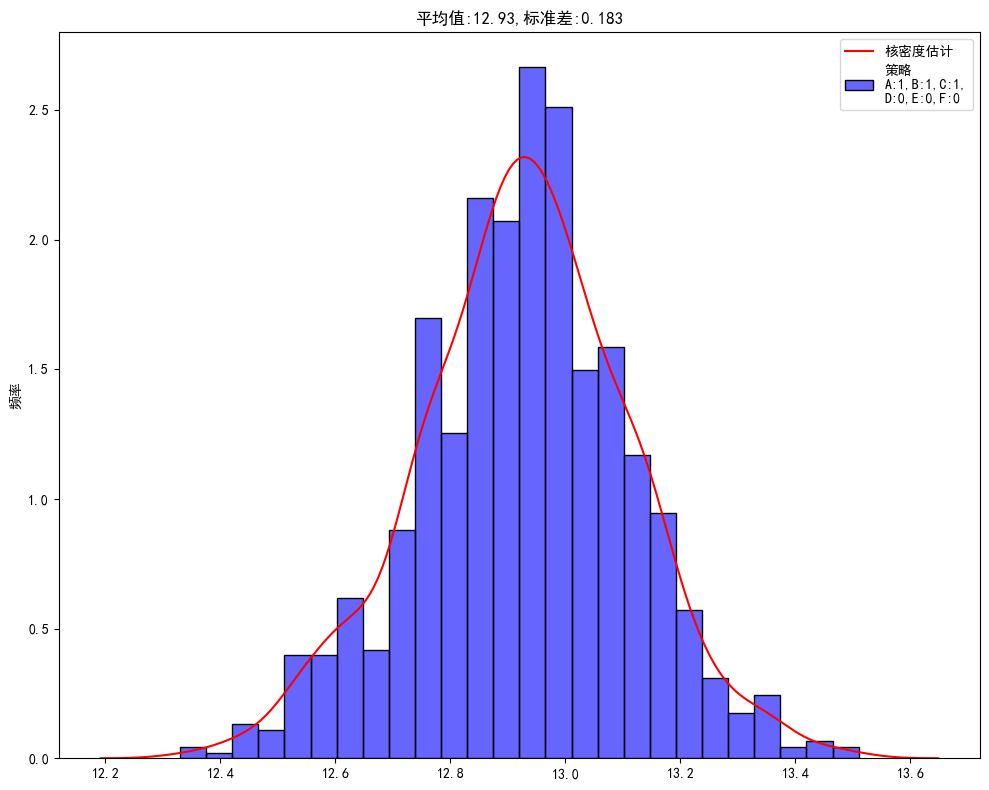

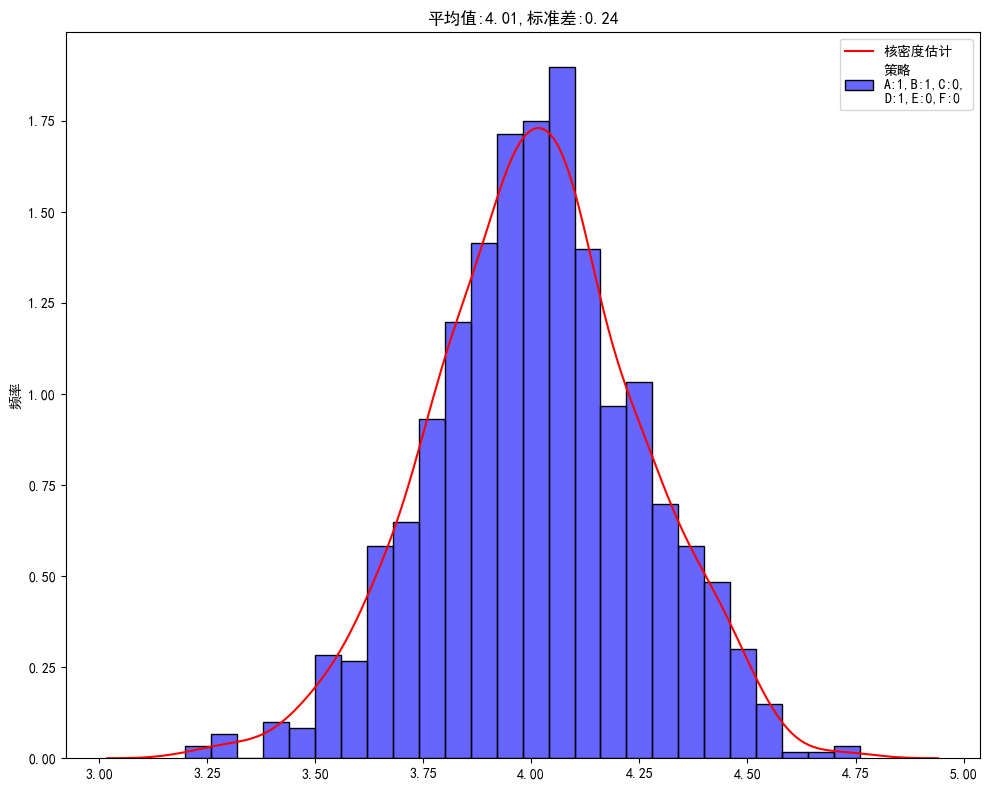

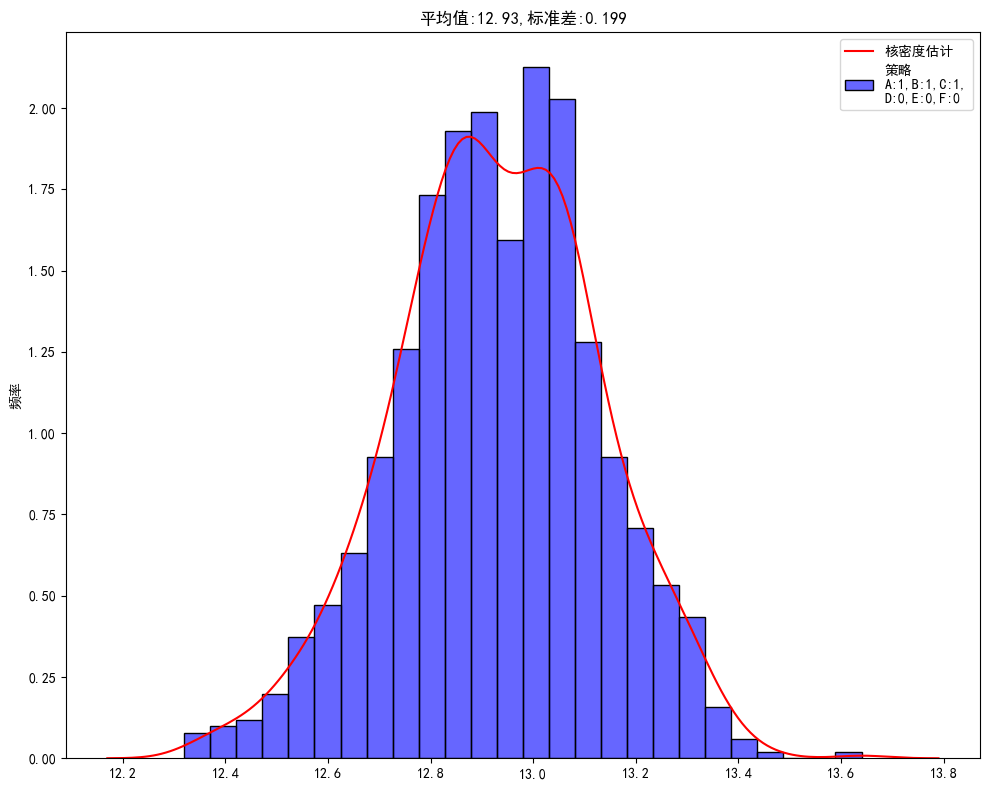

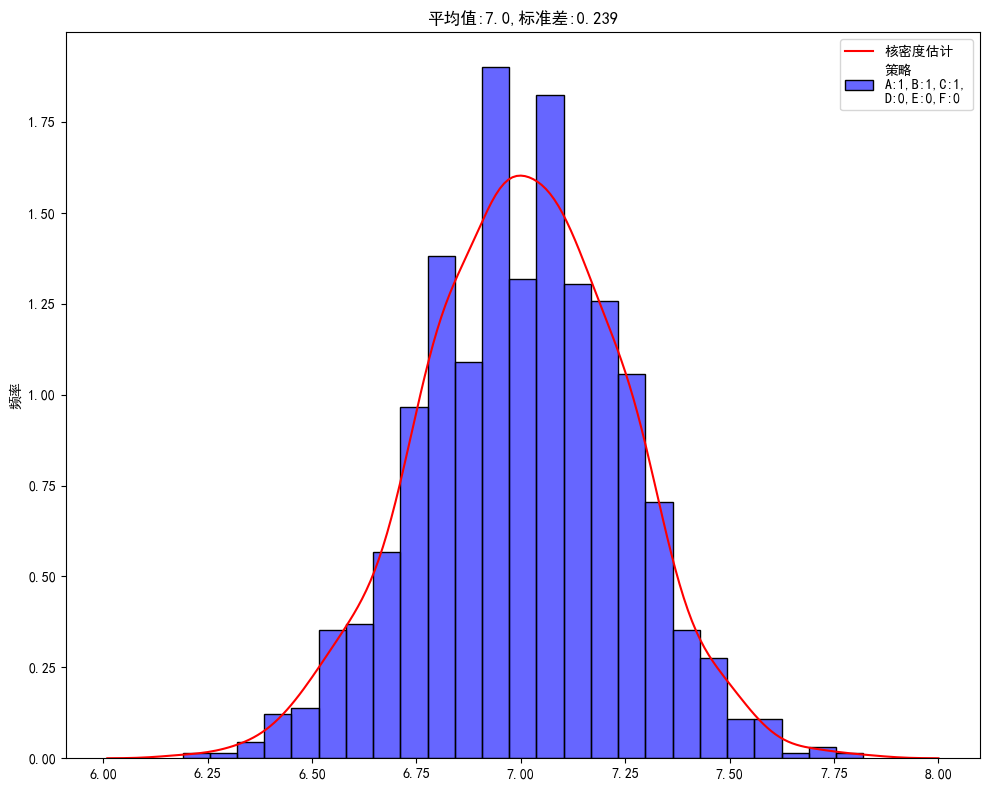

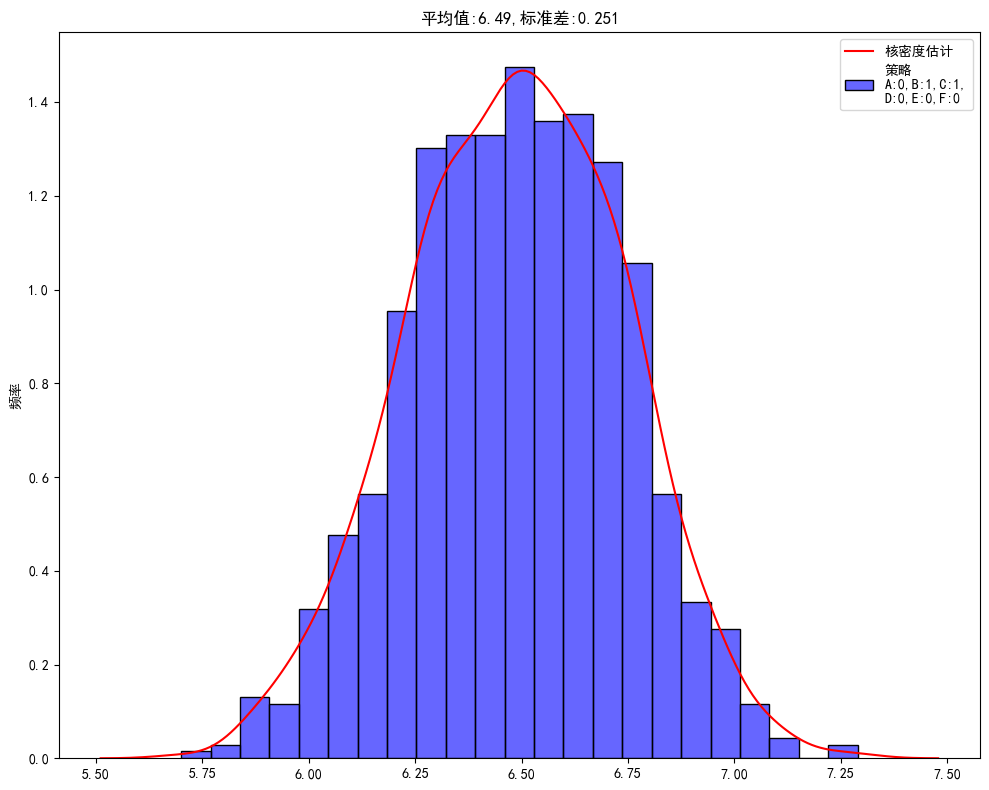

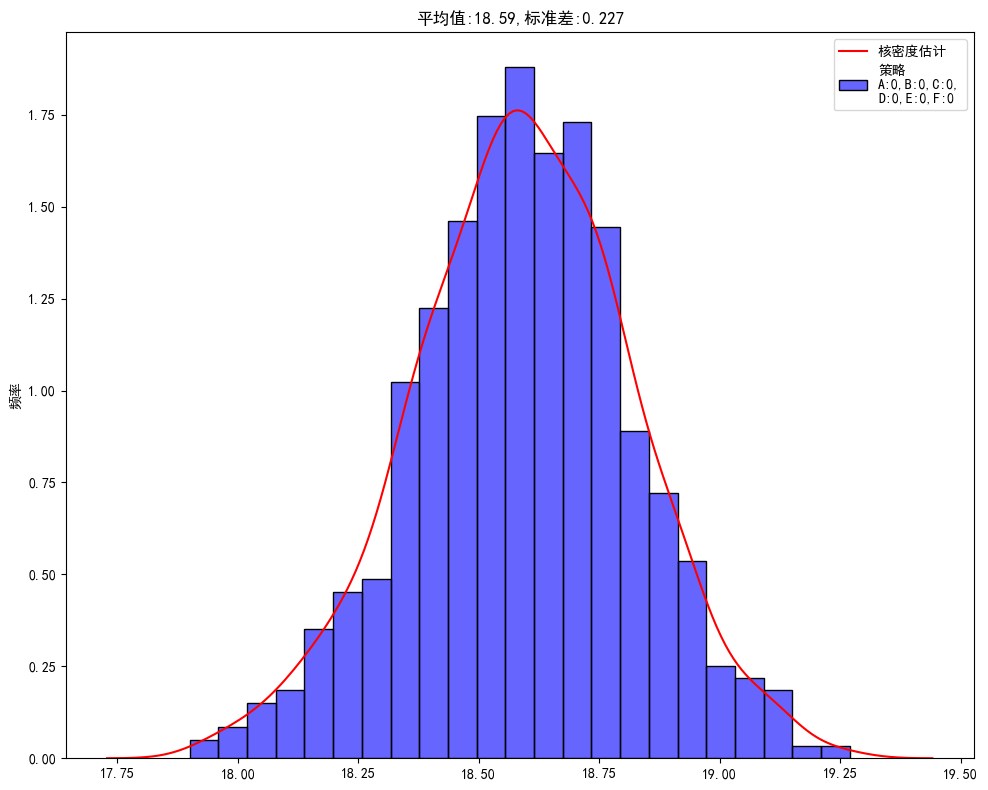

In [10]:
# 使用函数绘制图形
for cond in range(6):
    csv_file = f"Q2_re/Q2_{cond+1}.csv"
    plot_histogram_with_pdf(csv_file) 